<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Correlations_and_Linear_Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Correlations Example
A restaurant's chef is concerned about the amount of sugar he'll add to a dessert's recipe. Therefore, it makes 10 versions of the sweet, with different levels of sugar, and asks customers to declare their preference. How do sugar and customer preference relate?

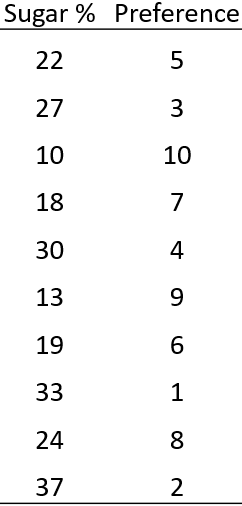

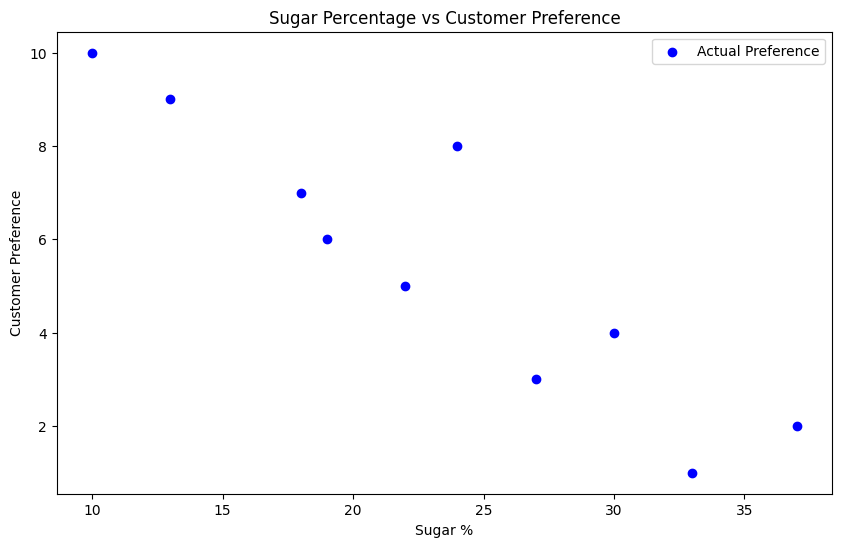

-0.9030303030303028

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

data = {
    'Sugar %': [22, 27, 10, 18, 30, 13, 19, 33, 24, 37],
    'Preference': [5, 3, 10, 7, 4, 9, 6, 1, 8, 2]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Calculate the Spearman's rank correlation coefficient
spearman_correlation_coefficient, _ = spearmanr(df['Sugar %'], df['Preference'])

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Sugar %'], df['Preference'], color='blue', label='Actual Preference')
plt.title('Sugar Percentage vs Customer Preference')
plt.xlabel('Sugar %')
plt.ylabel('Customer Preference')
plt.legend()
plt.show()

# Output the Spearman's rank correlation coefficient
spearman_correlation_coefficient

# 2. Simple linear regression
A marketing department is interested in determining the relationship between spending in advertisement and generated revenue. The following data has been collected for analysis.

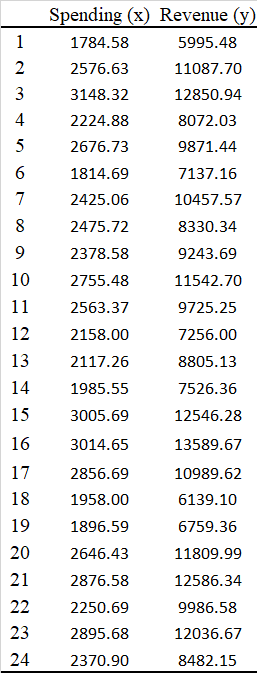

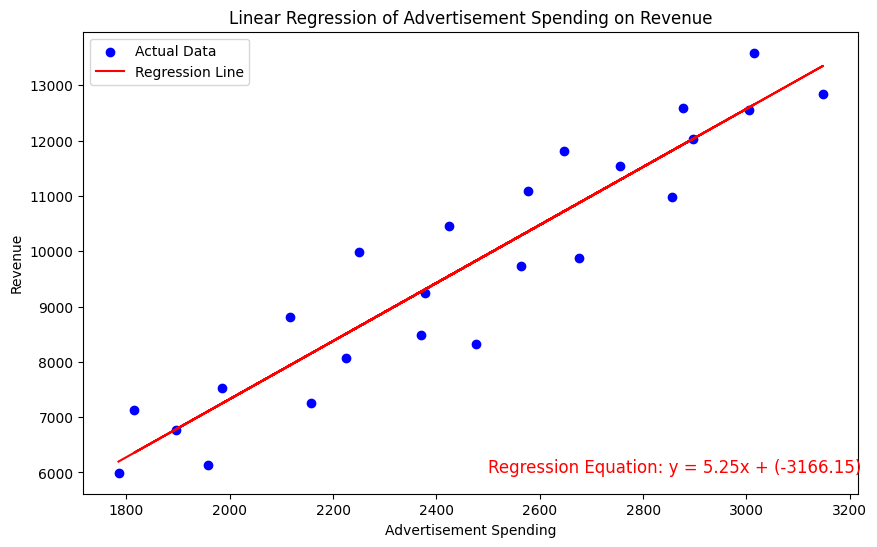

          Spending       Revenue
count    24.000000     24.000000
mean   2452.364583   9701.147917
std     405.548489   2268.958601
min    1784.580000   5995.480000
25%    2147.815000   7935.612500
50%    2450.390000   9798.345000
75%    2780.782500  11609.522500
max    3148.320000  13589.670000
Regression Equation: y = 5.25x + (-3166.15)
MSE: 594497.7589511903
R^2: 0.8795018209693297


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


data = {
    'Spending': [
        1784.58, 2576.63, 3148.32, 2224.88, 2676.73, 1814.69, 2425.06,
        2475.72, 2378.58, 2755.48, 2563.37, 2158.00, 2117.26, 1985.55,
        3005.69, 3014.65, 2856.69, 1958.00, 1896.59, 2646.43, 2876.58,
        2250.69, 2895.68, 2370.90
    ],
    'Revenue': [
        5995.48, 11087.70, 12850.94, 8072.03, 9871.44, 7137.16, 10457.57,
        8330.34, 9243.69, 11542.70, 9725.25, 7256.00, 8805.13, 7526.36,
        12546.28, 13589.67, 10989.62, 6139.10, 6759.36, 11809.99, 12586.34,
        9986.58, 12036.67, 8482.15
    ]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Calculating descriptive statistics
descriptive_stats = df.describe()

# Adding a constant to the independent value for statsmodels
X = sm.add_constant(df['Spending'])
y = df['Revenue']

# Creating an Ordinary Least Squares (OLS) regression model with statsmodels library
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Getting the model parameters for the formula
intercept, slope = model.params

# Calculating MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Spending'], df['Revenue'], color='blue', label='Actual Data')
plt.plot(df['Spending'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of Advertisement Spending on Revenue')
plt.xlabel('Advertisement Spending')
plt.ylabel('Revenue')
plt.legend()

# Adding the regression equation to the plot
plt.text(2500, 6000, f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})', fontsize=12, color='red')

plt.show()

# Returning the descriptive statistics, the regression equation, MSE, and R-squared value
# descriptive_stats, f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}', mse, r2
print(descriptive_stats)
print(f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})')

print(f"MSE: {mse}")
print(f"R^2: {r2}")

There are no outliers and it seems that there is a positive monotonic association between the two variables: the higher the marketing spending the higher the generated income. It also seems that there is a linear relationship between the two. Such visual checking is important before you proceed to any further analysis.


In [3]:
# Adding a constant to the independent value
X = sm.add_constant(df['Spending'].values)

# Dependent variable
y = df['Revenue'].values

# Creating an OLS regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
regression_summary = model.summary()

# Get detailed tables from summary as DataFrames
tables = model.summary2().tables
regression_statistics_df = pd.DataFrame(tables[0])

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.39e-11
Time:                        22:47:50   Log-Likelihood:                -193.60
No. Observations:                  24   AIC:                             391.2
Df Residuals:                      22   BIC:                             393.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3166.1451   1028.645     -3.078      0.006   -5299.424   -1032.867
x1             5.2469      0.414     12.672      0.000       4.388       6.106
==============================================================================
Omnibus:                        2.575   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.210
Skew:                          -0.031   Prob(JB):                        0.546
Kurtosis:                       1.902   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is important to check the predictive power of the model(R-squared) and test the significance of the model based on the F Significance or Prob (F-statistic).

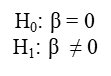

In [4]:
from scipy.stats import zscore

# Normality test for residuals:

# Using the same DataFrame 'df' from the previous analysis
# We will calculate the residuals and their standardized values (z-scores)

# Fitting the model
model = LinearRegression()
model.fit(df[['Spending']], df['Revenue'])

# Adding predictions to the dataframe
df['Fitted_value'] = model.predict(df[['Spending']])

# Residuals
df['Residual'] = df['Revenue'] - df['Fitted_value']

# Standardized Residuals
df['Standardized_Res'] = zscore(df['Residual'])

# Residual Output Table
residual_output = df[['Fitted_value', 'Standardized_Res']]

# Standardized Residual Descriptive Statistics
std_res_desc = df['Standardized_Res'].describe()
pd.options.display.float_format = '{:.4f}'.format

print(residual_output)

print("\nDescriptive statistics:")
std_res_desc

    Fitted_value  Standardized_Res
0      6197.3541           -0.2618
1     10353.1552            0.9527
2     13352.7511           -0.6508
3      8507.5608           -0.5649
4     10878.3691           -1.3059
5      6355.3380            1.0140
6      9557.8837            1.1669
7      9823.6913           -1.9368
8      9314.0081           -0.0912
9     11291.5619            0.3257
10    10283.5814           -0.7241
11     8156.6486           -1.1681
12     7942.8902            1.1183
13     7251.8220            0.3561
14    12604.3868           -0.0754
15    12651.3990            1.2169
16    11822.5999           -1.0803
17     7107.2702           -1.2557
18     6785.0585           -0.0333
19    10719.3883            1.4145
20    11926.9605            0.8552
21     8642.9831            1.7426
22    12027.1762            0.0123
23     9273.7120           -1.0266

Descriptive statistics:


,Standardized_Res
count,24.0000
mean,-0.0000
std,1.0215
min,-1.9368
25%,-0.7998
50%,-0.0543
75%,0.9680
max,1.7426


       Spending    Revenue  Fitted_value   Residual  Standardized_Res
count   24.0000    24.0000       24.0000    24.0000           24.0000
mean  2452.3646  9701.1479     9701.1479     0.0000           -0.0000
std    405.5485  2268.9586     2127.8693   787.6201            1.0215
min   1784.5800  5995.4800     6197.3541 -1493.3513           -1.9368
25%   2147.8150  7935.6125     8103.2090  -616.6390           -0.7998
50%   2450.3900  9798.3450     9690.7875   -41.9027           -0.0543
75%   2780.7825 11609.5225    11424.3214   746.3641            0.9680
max   3148.3200 13589.6700    13352.7511  1343.5969            1.7426
Box Plot Values:
Q1: -0.7997530601537218, Q3: 0.9680006220804349, IQR: 1.7677536822341566
Lower Bound for Outliers: -3.451383583504957
Upper Bound for Outliers: 3.6196311454316703

Rounded Number of classes: 5
class Range: 0.7358787960326905


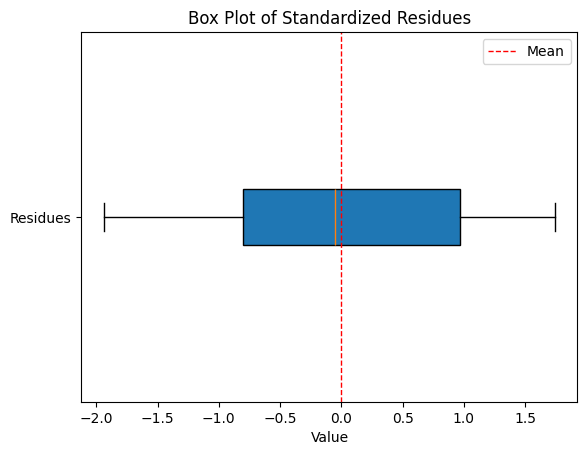

Classes:
   Standard_Residuals  Frequency
0             -1.2009          3
1             -0.4651          6
2              0.2708          5
3              1.0067          4
4              1.7426          6 



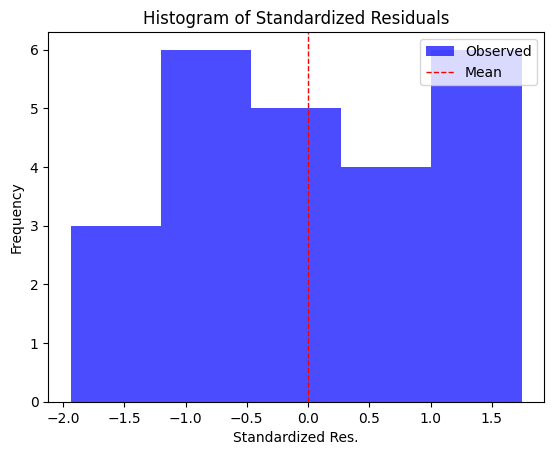

     CDF  Bin Frequency  Expected Value
0 0.1199         0.1199          2.8768
1 0.3245         0.2046          4.9102
2 0.6045         0.2801          6.7220
3 0.8378         0.2333          5.5985
4 0.9560         0.1182          2.8362
5  Sum =         0.9560         22.9437
Chi-Square Table:
       χ^2
0   0.0053
1   0.2419
2   0.4411
3   0.4564
4   3.5294
Sum 4.6741
Chi-square Statistic: 4.42184058938793, p-value: 0.10959973803157165


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Using describe() to get most of the descriptive statistics
desc_stats = df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = df['Standardized_Res'].quantile(0.25)
Q3 = df['Standardized_Res'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard deviation
mean = df['Standardized_Res'].mean()
std_dev = df['Standardized_Res'].std()

# Calculate Sturges' number of bins
n = len(df)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(df['Standardized_Res']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(df['Standardized_Res'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(df['Standardized_Res'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Standardized Residues')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Standard_Residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized, ddof=2)
hist_df.Standard_Residuals = hist_df.Standard_Residuals + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(df['Standardized_Res'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Res.')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_values.sum()]
})

# Append the sum row to the table
table_df = pd.concat([table_df, sum_row], ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

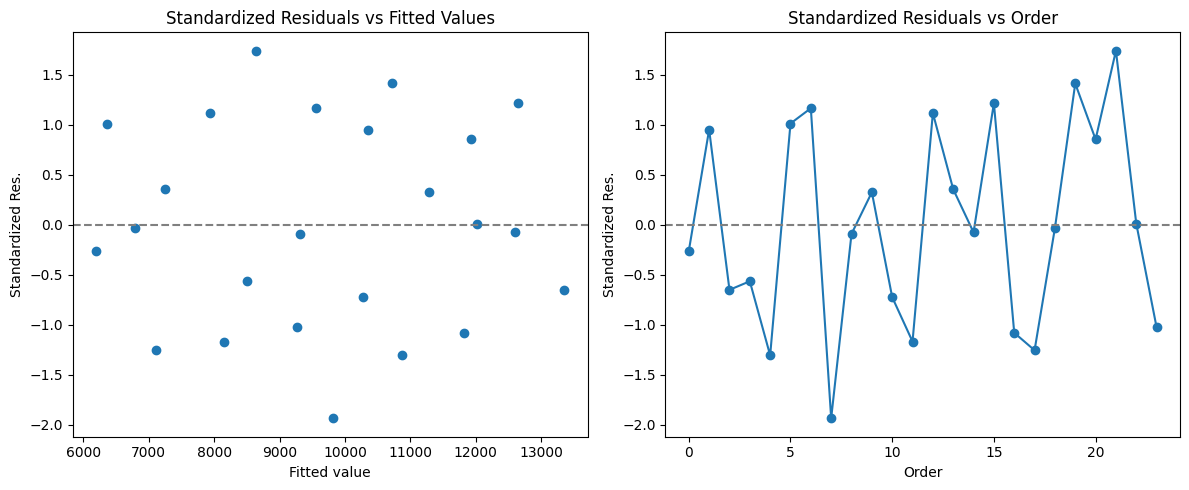

,Spending (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound
0,2550,2.0739,822.9211,1706.6340,8506.7965,10213.4304,11920.0644
1,3200,2.0739,878.2996,1821.4820,11802.4285,13623.9105,15445.3925


In [6]:
from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals
# Based on the provided parameters and spending values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = 2452.4  # Mean of Spending
s_x = 405.5  # Standard deviation of Spending
n = len(df)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-2)  # t-value for 95% confidence

# Spending values for which we want to calculate prediction intervals
spending_values = [2550, 3200]

# Data for the model
X = df['Spending'].values.reshape(-1, 1)
y = df['Revenue'].values


# Fitting the model
model = LinearRegression().fit(X, y)

# Residual standard error (RSE)
residuals = y - model.predict(X)
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n - 1)))
    prediction = model.predict([[x_new]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each spending value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in spending_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=spending_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'Spending (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(df['Fitted_value'], df['Standardized_Res'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Fitted Values')

# Residuals vs Order of data with line connecting points
plt.subplot(1, 2, 2)
plt.plot(df.index, df['Standardized_Res'], marker='o', linestyle='-')  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Order')

plt.tight_layout()
plt.show()

# Show the updated prediction table
prediction_table.reset_index().rename(columns={'index': 'Spending (x)'})


-Check whether the residuals have a constant variance.

-Check whether the residuals are independent.